In [183]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.metrics import make_scorer


loss = np.array([[0,1,2],[1,0,1],[2,1,0]])

def temp(ytruetest, ytruetrain, ypredtest, ypredtrain):
    # 
    days = len(ytruetest)
    losstrain = np.zeros(days)
    losstest = np.zeros(days)
    acctrain = np.zeros(days)
    acctest = np.zeros(days)
    
    for i in range(days):
        conftrain = confusion_matrix(ytruetrain[i], ypredtrain[i])
        acctrain[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(conftrain[0] + conftrain[1])
        losstrain[i] = np.sum(conftrain * loss)
        
        conftest = confusion_matrix(ytruetest[i], ypredtest[i])
        acctest[i] = (conftest[0,0] + conftest[2,2])/np.sum(conftest[0] + conftest[1])
        losstest[i] = np.sum(conftest * loss)
        
    return(losstrain, losstest, acctrain, acctest)

# Loading in Data

In [100]:
DF = pd.read_csv('data_final.csv',
                 index_col = 0,
                 dtype={'Time':str})

D:\Programs\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [95]:
DF.loc[:,'Time'] = DF.loc[:,'Time'].replace(np.nan,'',regex=True)

##### extract out trading days (non-Sunday) #####
day_p = np.zeros(DF.shape[0])
dates = np.unique(DF['Date'].values)
wknd = [day for day in dates if datetime.strptime(day,'%m/%d/%Y').weekday()>=5]
for idx, day in enumerate(wknd):
    day_p += DF['Date'].values == day
    
DF = DF[day_p == 0]
#################################################

DF.head()

# Exploration

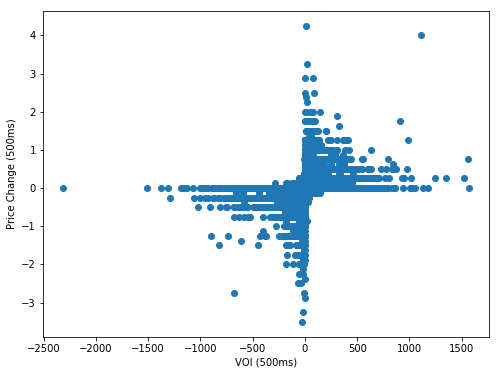

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(DF['OI'],DF['dM'])
plt.xlabel("VOI (500ms)")
plt.ylabel("Price Change (500ms)")
plt.show()

In [5]:
DF[['OI','dM']].corr()

,OI,dM
OI,1.000000,0.401592
dM,0.401592,1.000000


# SVM

## Extracting days

In [6]:
dates = np.unique(DF['Date'].values)
wkdys = [day for day in dates if datetime.strptime(day,'%m/%d/%Y').weekday()<5]
train_dys = wkdys[:7]

In [7]:
train_dys

['01/02/2019',
 '01/03/2019',
 '01/04/2019',
 '01/07/2019',
 '01/08/2019',
 '01/09/2019',
 '01/10/2019']

In [10]:
x_labs = ['OI_a1', 'OI_a2', 'OI_a3', 'OI_a4', 'OI_a5'] # covars
y_labs = ['signal','signal2','signal3','signal4','signal5','signal6']

# list of data frames for the first 7 business days
tdf = [DF.loc[DF['Date'] == d,x_labs+y_labs].dropna() for d in train_dys]

In [9]:
def my_confusion_matrix(mat):
    # input is whatever is returned by sklearn's
    # confusion matrix
    cols = ['Buy (p)','Hold (p)','Sell (p)']
    ind = ['Buy (t)','Hold (t)','Sell (t)']
    return pd.DataFrame(mat, columns=cols,index=ind)

## SVM Model 1

In [12]:
# C = 1/100
# six models per day
# what to record
#     - confusion matrix
#     - time to fit?

# takes approximately 3 minutes per model
# 6 models
# 7 days --> 6 train days
# 36 * 3 = 108 minutes to train

'''
conf_mats = [] # row - day, column - model
fit_time  = [] # row - day, column - model

for idx, d in tqdm(enumerate(train_dys[:-1])):
    print("day",idx+1,'----------\n')
    mat_vec = []  # store the confusion matrices
    time_vec = [] # store the fitting time
    svmfit = svm.SVC(C=10**-2,kernel='linear',class_weight = 'balanced')
    
    today = tdf[idx]    # train on today
    tom   = tdf[idx+1]  # test on tomorrow
    
    # train model on each signal
    for j, y in tqdm(enumerate(y_labs)):
        print("starting fitting...", j + 1, y, sep = '\t')
        start = time.time()
        svmfit.fit(today[x_labs].values,today[y].values)
        print("completed fitting...", j + 1, y, sep='\t')
        
        end = time.time()
        print('time', end-start, j+1, y, sep='\t')
        
        # record time to fit
        time_vec.append(end-start)
        
        # predict on day ahead
        pred = svmfit.predict(tom[x_labs])
        
        # return the confusion matrix
        mat = confusion_matrix(tom[y].values,pred,[1,0,-1])
        mat_vec.append(my_confusion_matrix(mat))
        
    conf_mats.append(mat_vec)
    fit_time.append(time_vec)
'''

0it [00:00, ?it/s]

day 1 ----------




0it [00:00, ?it/s]

starting fitting...	1	signal
completed fitting...	1	signal
time	198.50799703598022	1	signal



1it [03:37, 217.60s/it]

starting fitting...	2	signal2
completed fitting...	2	signal2
time	212.74071264266968	2	signal2



2it [07:29, 221.89s/it]

starting fitting...	3	signal3
completed fitting...	3	signal3
time	208.59176683425903	3	signal3



3it [11:14, 222.74s/it]

starting fitting...	4	signal4
completed fitting...	4	signal4
time	165.03741669654846	4	signal4



4it [14:15, 210.34s/it]

starting fitting...	5	signal5
completed fitting...	5	signal5
time	215.1413550376892	5	signal5



5it [18:08, 217.17s/it]

starting fitting...	6	signal6
completed fitting...	6	signal6
time	222.87445783615112	6	signal6



6it [22:08, 224.02s/it]
1it [22:08, 1328.73s/it]

day 2 ----------




0it [00:00, ?it/s]

starting fitting...	1	signal
completed fitting...	1	signal
time	218.12138175964355	1	signal



1it [03:56, 236.54s/it]

starting fitting...	2	signal2
completed fitting...	2	signal2
time	232.15705275535583	2	signal2



2it [08:07, 240.74s/it]

starting fitting...	3	signal3
completed fitting...	3	signal3
time	225.06218838691711	3	signal3



3it [12:07, 240.73s/it]

starting fitting...	4	signal4
completed fitting...	4	signal4
time	195.63324880599976	4	signal4



4it [15:39, 231.89s/it]

starting fitting...	5	signal5
completed fitting...	5	signal5
time	246.7946617603302	5	signal5



5it [20:03, 241.53s/it]

starting fitting...	6	signal6
completed fitting...	6	signal6
time	256.5535497665405	6	signal6



6it [24:37, 251.28s/it]
2it [46:45, 1373.24s/it]

day 3 ----------




0it [00:00, ?it/s]

starting fitting...	1	signal
completed fitting...	1	signal
time	265.86363983154297	1	signal



1it [04:44, 284.74s/it]

starting fitting...	2	signal2
completed fitting...	2	signal2
time	292.0455849170685	2	signal2



2it [09:57, 293.12s/it]

starting fitting...	3	signal3
completed fitting...	3	signal3
time	256.76697993278503	3	signal3



3it [14:30, 287.04s/it]

starting fitting...	4	signal4
completed fitting...	4	signal4
time	220.35093116760254	4	signal4



4it [18:27, 271.95s/it]

starting fitting...	5	signal5
completed fitting...	5	signal5
time	371.539986371994	5	signal5



5it [24:55, 306.85s/it]

starting fitting...	6	signal6
completed fitting...	6	signal6
time	296.0698187351227	6	signal6



6it [30:08, 308.73s/it]
3it [1:16:54, 1503.79s/it]

day 4 ----------




0it [00:00, ?it/s]

starting fitting...	1	signal
completed fitting...	1	signal
time	282.7407691478729	1	signal



1it [05:02, 302.79s/it]

starting fitting...	2	signal2
completed fitting...	2	signal2
time	313.79838275909424	2	signal2



2it [10:35, 311.68s/it]

starting fitting...	3	signal3
completed fitting...	3	signal3
time	273.60890007019043	3	signal3



3it [15:25, 305.35s/it]

starting fitting...	4	signal4
completed fitting...	4	signal4
time	222.62432956695557	4	signal4



4it [19:25, 285.53s/it]

starting fitting...	5	signal5
completed fitting...	5	signal5
time	320.24413871765137	5	signal5



5it [25:02, 301.05s/it]

starting fitting...	6	signal6
completed fitting...	6	signal6
time	324.827805519104	6	signal6



6it [30:44, 313.45s/it]
4it [1:47:38, 1606.07s/it]

day 5 ----------




0it [00:00, ?it/s]

starting fitting...	1	signal
completed fitting...	1	signal
time	350.5011899471283	1	signal



1it [06:09, 369.52s/it]

starting fitting...	2	signal2
completed fitting...	2	signal2
time	371.4112038612366	2	signal2



2it [12:39, 375.65s/it]

starting fitting...	3	signal3
completed fitting...	3	signal3
time	324.40201210975647	3	signal3



3it [18:21, 365.64s/it]

starting fitting...	4	signal4
completed fitting...	4	signal4
time	252.2849361896515	4	signal4



4it [22:49, 336.35s/it]

starting fitting...	5	signal5
completed fitting...	5	signal5
time	367.01312136650085	5	signal5



5it [29:13, 350.61s/it]

starting fitting...	6	signal6
completed fitting...	6	signal6
time	383.1959283351898	6	signal6



6it [35:54, 365.71s/it]
5it [2:23:33, 1770.62s/it]

day 6 ----------




0it [00:00, ?it/s]

starting fitting...	1	signal
completed fitting...	1	signal
time	334.1198077201843	1	signal



1it [05:52, 352.48s/it]

starting fitting...	2	signal2
completed fitting...	2	signal2
time	355.9196801185608	2	signal2



2it [12:08, 359.66s/it]

starting fitting...	3	signal3
completed fitting...	3	signal3
time	311.74687027931213	3	signal3



3it [17:38, 350.60s/it]

starting fitting...	4	signal4
completed fitting...	4	signal4
time	245.78737807273865	4	signal4



4it [22:00, 324.04s/it]

starting fitting...	5	signal5
completed fitting...	5	signal5
time	334.22173738479614	5	signal5



5it [27:51, 332.18s/it]

starting fitting...	6	signal6
completed fitting...	6	signal6
time	355.685307264328	6	signal6



6it [34:05, 344.75s/it]
6it [2:57:39, 1853.14s/it]


# Train

In [141]:
dates = np.unique(DF['Date'].values)
df_list = [DF.loc[DF['Date']==d,x_labs+['signal6']].dropna() for d in dates]

In [150]:
train_list = df_list[:4] # first 4 days
x_labs = ['OI_a1','OI_a2','OI_a3','OI_a4','OI_a5']

# signal6

# What we want
#   training predictions
#   test predictions
#   signal columns

In [156]:
conf_mats = []
ypred_tr  = [] # store training predictions
ypred_te  = [] # store test predictions
times     = [] # fitting times


for idx, dft in tqdm(enumerate(train_list[:-1])):
    print("---------- Day",idx+1,'----------\n')
    mat_vec = []  # store the confusion matrices
    
    svmfit = svm.SVC(C=10**-2,kernel='linear',class_weight = 'balanced')
    
    today = dft                # train on today
    tom   = train_list[idx+1]  # test on tomorrow
    
    #####
    start = time.time()
    print("Training...")
    svmfit.fit(today[x_labs].values,today['signal6'].values)
    end = time.time()
    t = np.int64(end-start)
    print("Training complete...", t)
    times.append(t)
    #####
    
    y_tr   = today['signal6'].values
    y_te   = tom['signal6'].values
    
    print("Predicting on training...")
    yhat_r = svmfit.predict(today[x_labs])
    
    print("Predicting on test...")
    yhat_e = svmfit.predict(tom[x_labs])
    
    ypred_tr.append(yhat_r)
    ypred_te.append(yhat_e)
    
    tr_mat = confusion_matrix(y_tr, yhat_r,labels=[1,0,-1])
    te_mat = confusion_matrix(y_te, yhat_e,labels=[1,0,-1])
    mat_vec = [my_confusion_matrix(tr_mat),my_confusion_matrix(tr_mat)]
    
    conf_mats.append(mat_vec)


0it [00:00, ?it/s]

---------- Day 1 ----------

Training...
Training complete... 219
Predicting on training...
Predicting on test...



1it [04:14, 254.04s/it]

---------- Day 2 ----------

Training...
Training complete... 248
Predicting on training...
Predicting on test...



2it [08:57, 262.72s/it]

---------- Day 3 ----------

Training...
Training complete... 299
Predicting on training...
Predicting on test...



3it [14:31, 284.32s/it]


In [180]:
loss = np.array([[0,1,2],[1,0,1],[2,1,0]])

def my_loss_fn(ytruetest, ytruetrain, ypredtest, ypredtrain):
    
    days = len(ytruetest)
    losstrain = np.zeros(days)
    losstest = np.zeros(days)
    acctrain = np.zeros(days)
    acctest = np.zeros(days)
    acctrain1 = np.zeros(days)
    acctest1 = np.zeros(days)
    
    for i in range(days):
        conftrain = confusion_matrix(ytruetrain[i], ypredtrain[i])
        acctrain[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(conftrain[0] + conftrain[2])
        acctrain1[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(
            conftrain[0,0] + conftrain[0,2] + conftrain[2,0] + conftrain[2,2])
        losstrain[i] = np.sum(conftrain * loss)
        
        conftest = confusion_matrix(ytruetest[i], ypredtest[i])
        acctest[i] = ((conftest[0,0] + conftest[2,2])/
                      np.sum(conftest[0] + conftest[2]))
        acctest1[i] = (conftest[0,0] + conftest[2,2])/np.sum(
            conftest[0,0] + conftest[0,2] + conftest[2,0] + conftest[2,2])
        losstest[i] = np.sum(conftest * loss)
    
    ind = [('Day ' + str(i+1))for i in range(days)]
    col = ['Loss Train','Loss Test','Accuracy Train 1',
           'Accuracy Train 2','Accuracy Test 1',
           'Accuracy Test 2']
    retv = zip(col,(losstrain, losstest, acctrain, acctrain1, acctest, acctest1))
    return pd.DataFrame(dict(retv),index=ind)

In [181]:
ytruetest = [train['signal6'].values for train in train_list[1:]]
ytruetrain= [train['signal6'].values for train in train_list[:-1]]

In [182]:
my_loss_fn(ytruetest,ytruetrain,ypred_te,ypred_tr)

,Loss Train,Loss Test,Accuracy Train 1,Accuracy Train 2,Accuracy Test 1,Accuracy Test 2
Day 1,30672.0,31693.0,0.555573,0.772740,0.553760,0.765241
Day 2,31700.0,31674.0,0.555877,0.765182,0.594732,0.776941
Day 3,30310.0,29896.0,0.561655,0.788181,0.593237,0.802550


In [184]:
def trading_loss(ytrue,ypred):
    conftrain = confusion_matrix(ytrue, ypred)
    loss = np.array([[0,1,2],[1,0,1],[2,1,0]])
    return np.sum(conftrain * loss)


trade_scorer=make_scorer(trading_loss,greater_is_better=False)

In [188]:
trade_scorer

make_scorer(trading_loss, greater_is_better=False)